In [ ]:
import numpy as np
import pandas as pd


# function load the dataset

In [ ]:
from sklearn.datasets import load_iris

def load_data():
    iris = load_iris()

    df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
    df['Species'] = iris.target
    return df


# function to process the dataset

In [ ]:
def preprocess_data(df):

    outlier_columns = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

    for col in outlier_columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        upper_limit = q3 + 1.5 * iqr
        lower_limit = q1 - 1.5 * iqr
        df[col] = df[col].clip(lower=lower_limit, upper=upper_limit)

    if df.isnull().sum().any():
        print("Missing values found!")

    return df


# function to encode dataset

In [ ]:
from sklearn.preprocessing import LabelEncoder


def encode_species(df):
    le = LabelEncoder()
    df['Species'] = le.fit_transform(df['Species'])
    return df


# Function to calculate accuracy


In [ ]:
def calculate_accuracy(predicted_y, y):
    correct_y =np.sum((predicted_y==y))
    acc=correct_y/len(y)
    #TP+TN
    #/
    #TP+FP+FN+TN
    return acc*100

# function to split test

In [ ]:
def train_validate_test_split(data, labels, test_ratio=0.3, val_ratio=0.3):
      test_set_size = int(len(data) * test_ratio)
      val_set_size = int(len(data) * val_ratio)
      indices = np.random.permutation(len(data))#shuffle(data)

      test_indices = indices[:test_set_size] #test set
      val_indices = indices[test_set_size:test_set_size + val_set_size] #validate set
      train_indices = indices[test_set_size + val_set_size:]#train set

      X_train, X_val, X_test = data.iloc[train_indices], data.iloc[val_indices], data.iloc[test_indices]
      #from indices to data

      y_train, y_val, y_test = labels.iloc[train_indices], labels.iloc[val_indices], labels.iloc[test_indices]

      return X_train, X_val, X_test, y_train, y_val, y_test






### load dataset and process

In [ ]:
iris = load_data()


In [ ]:
iris = preprocess_data(iris)


In [ ]:
iris_encoded=encode_species(iris)

## try dataset

In [ ]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   Species            150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [ ]:
iris.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal length (cm),150.0,5.843333,0.828066,4.30,5.1,5.80,6.4,7.90
sepal width (cm),150.0,3.054000,0.425390,2.05,2.8,3.00,3.3,4.05
petal length (cm),150.0,3.758000,1.765298,1.00,1.6,4.35,5.1,6.90
petal width (cm),150.0,1.199333,0.762238,0.10,0.3,1.30,1.8,2.50
Species,150.0,1.000000,0.819232,0.00,0.0,1.00,2.0,2.00


In [ ]:
iris.corr(numeric_only = True)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
sepal length (cm),1.000000,-0.118719,0.871754,0.817941,0.782561
sepal width (cm),-0.118719,1.000000,-0.427873,-0.365317,-0.426572
petal length (cm),0.871754,-0.427873,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.365317,0.962865,1.000000,0.956547
Species,0.782561,-0.426572,0.949035,0.956547,1.000000


In [ ]:
iris.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
Species              0
dtype: int64

In [ ]:
print(iris["Species"].unique())

[0 1 2]


In [ ]:
iris_encoded.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


# Prepare feature matrix X and target vector y


In [ ]:
X = iris[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]

y = iris['Species']

## Split data into train, validation, and test sets


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

X_train, X_val, X_test, y_train, y_val, y_test = train_validate_test_split(X, y)


gaussian_nb = GaussianNB()

gaussian_nb.fit(X_train, y_train)

GaussianNB()

## calculate accuracy

In [ ]:
y_test_pred = gaussian_nb.predict(X_test)
test_accuracy = calculate_accuracy(y_test_pred, y_test)
print(f'Test Accuracy: {test_accuracy:.2f}%')

Test Accuracy: 97.78%


## calculate validation

In [ ]:
y_val_pred = gaussian_nb.predict(X_val)
val_accuracy = calculate_accuracy(y_val_pred, y_val)
print(f'Validation Accuracy: {val_accuracy:.2f}%')

Validation Accuracy: 95.56%


# Data visualization

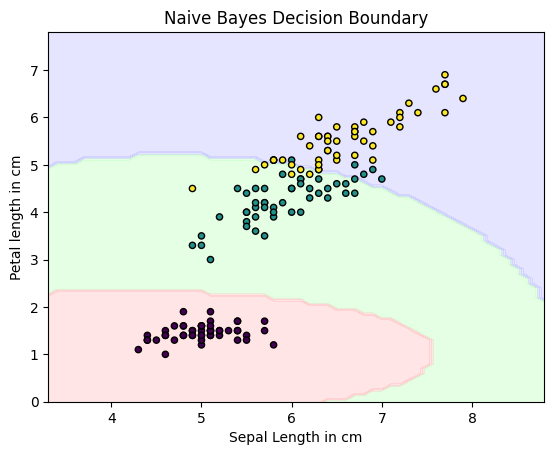

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

X_plot = X[['sepal length (cm)', 'petal length (cm)']].values
y_plot = y.values

# Fit model on selected features
gaussian_nb.fit(X_plot, y_plot)

x_min, x_max = X_plot[:, 0].min() - 1, X_plot[:, 0].max() + 1
y_min, y_max = X_plot[:, 1].min() - 1, X_plot[:, 1].max() + 1

#grid
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Z = gaussian_nb.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF']))
plt.scatter(X_plot[:, 0], X_plot[:, 1], c=y_plot, edgecolor='k', s=20)


# Labeling the axes
plt.xlabel('Sepal Length in cm')
plt.ylabel('Petal length in cm')
plt.title("Naive Bayes Decision Boundary")
plt.show()
